In [99]:
import pandas as pd
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [100]:
import pandas as pd
import numpy as np
from tqdm import tqdm

from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

In [101]:
testData = pd.read_csv('/content/gdrive/MyDrive/ML_Project/Dataset/test.csv')
trainData = pd.read_csv('/content/gdrive/MyDrive/ML_Project/Dataset/train.csv')
validData = pd.read_csv('/content/gdrive/MyDrive/ML_Project/Dataset/val.csv')

Six Buckets

In [4]:
train_data_target=pd.read_csv('/content/gdrive/MyDrive/ML_Project/Dataset/train_6_buckets.csv')
test_data_target=pd.read_csv('/content/gdrive/MyDrive/ML_Project/Dataset/test_6_buckets.csv')
val_data_target=pd.read_csv('/content/gdrive/MyDrive/ML_Project/Dataset/valid_6_buckets.csv')

In [5]:
test_data_target.columns

Index(['data_IMDBscore'], dtype='object')

In [6]:
testData['data_IMDBscore']=test_data_target['data_IMDBscore']
trainData['data_IMDBscore']=train_data_target['data_IMDBscore']
validData ['data_IMDBscore']=val_data_target['data_IMDBscore']

In [7]:
train_X = trainData.drop(columns=['data_IMDBscore'])
train_Y = trainData['data_IMDBscore']
test_X = testData.drop(columns=['data_IMDBscore'])
test_Y = testData['data_IMDBscore']
val_X = validData.drop(columns=['data_IMDBscore'])
val_Y = validData['data_IMDBscore']

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
logisticRegr = LogisticRegression()

In [10]:
logisticRegr.fit(train_X,train_Y)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [11]:
predictions=logisticRegr.predict(test_X)

In [12]:
# Use score method to get accuracy of model
print('Train Accuracy: ',logisticRegr.score(train_X, train_Y))
print('Test Accuracy: ', logisticRegr.score(test_X, test_Y))
print('Validation Accuracy: ', logisticRegr.score(val_X, val_Y))
#Weighted F1,weighted recall, weighted precisoon, weighted accuracy,verbose=1,return train_loss=true

Train Accuracy:  0.8212107299796682
Test Accuracy:  0.6288249694002448
Validation Accuracy:  0.6296296296296297


In [23]:
f1DictTrain={}
precisionDictTrain={}
recallDictTrain={}
accDictTrain={}
f1DictTest={}
recallDictTest={}
precisionDictTest={}
accDictTest={}
f1DictVal={}
precisionDictVal={}
recallDictVal={}
accDictVal={}
lossFn = ['hinge', 'log', 'modified_huber', 'perceptron']
for i in tqdm(range(len(lossFn))):
    fn = lossFn[i]
    sgd = SGDClassifier(learning_rate='optimal', verbose=0, max_iter=500, loss=fn)
    sgd.fit(train_X, train_Y)
    trainPreds = sgd.predict(train_X)
    testPreds = sgd.predict(test_X)
    valPreds = sgd.predict(val_X)
    key = str(fn)
    f1DictTrain[key] = f1_score(train_Y, trainPreds, average='weighted')
    precisionDictTrain[key] = precision_score(train_Y, trainPreds, average='weighted')
    recallDictTrain[key] = recall_score(train_Y, trainPreds, average='weighted')
    accDictTrain[key] = accuracy_score(train_Y, trainPreds, normalize=True)
    f1DictTest[key] = f1_score(test_Y, testPreds, average='weighted')
    precisionDictTest[key] = precision_score(test_Y, testPreds, average='weighted')
    recallDictTest[key] = recall_score(test_Y, testPreds, average='weighted')
    accDictTest[key] = accuracy_score(test_Y, testPreds, normalize=True)
    f1DictVal[key] = f1_score(val_Y, valPreds, average='weighted')
    precisionDictVal[key] = precision_score(val_Y, valPreds, average='weighted')
    recallDictVal[key] = recall_score(val_Y, valPreds, average='weighted')
    accDictVal[key] = accuracy_score(val_Y, valPreds, normalize=True)

  0%|          | 0/4 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 25%|██▌       | 1/4 [00:34<01:43, 34.60s/it]/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 50%|█████     | 2/4 [01:08<01:08, 34.07s/it]/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 75

In [25]:
print("f1DictTrain")
print(f1DictTrain)
print("precisionDictTrain")
print(precisionDictTrain)
print("recallDictTrain")
print(recallDictTrain)
print("accDictTrain")
print(accDictTrain)
print("f1DictTest")
print(f1DictTest)
print("recallDictTest")
print(recallDictTest)
print("precisionDictTest")
print(precisionDictTest)
print("accDictTest")
print(accDictTest)
print("f1DictVal")
print(f1DictVal)
print("precisionDictVal")
print(precisionDictVal)
print("recallDictVal")
print(recallDictVal)
print("accDictVal")
print(accDictVal)


f1DictTrain
{'hinge': 0.8091225776673927, 'log': 0.7854840060529266, 'modified_huber': 0.8104405939590711, 'perceptron': 0.7662909051537096}
precisionDictTrain
{'hinge': 0.8153415773114382, 'log': 0.7985986504906151, 'modified_huber': 0.8132540928620319, 'perceptron': 0.7698790300388934}
recallDictTrain
{'hinge': 0.8122253558076998, 'log': 0.7923525939529088, 'modified_huber': 0.8118974224437594, 'perceptron': 0.7657244048009445}
accDictTrain
{'hinge': 0.8122253558076998, 'log': 0.7923525939529088, 'modified_huber': 0.8118974224437594, 'perceptron': 0.7657244048009445}
f1DictTest
{'hinge': 0.6042010176797178, 'log': 0.616550268126362, 'modified_huber': 0.5971434943364176, 'perceptron': 0.5672476865078576}
recallDictTest
{'hinge': 0.6135250917992656, 'log': 0.631578947368421, 'modified_huber': 0.6006731946144431, 'perceptron': 0.5673194614443084}
precisionDictTest
{'hinge': 0.5988826796361713, 'log': 0.6144288162970938, 'modified_huber': 0.5945802297819386, 'perceptron': 0.5696945477153

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [ ]:
sgd = SGDClassifier(learning_rate='optimal', verbose=0, max_iter=500, loss='log')
sgd.fit(train_X, train_Y)
predictions= sgd.predict(test_X)


In [32]:
cm = metrics.confusion_matrix(test_Y, predictions)
print(cm)
cm.append([0,0,0,0,0,0])

[[   0    5   15    1    0]
 [   0   60  219   18    0]
 [   1   72 1286  428    0]
 [   0    8  432  720    1]
 [   0    0    0    1    1]]


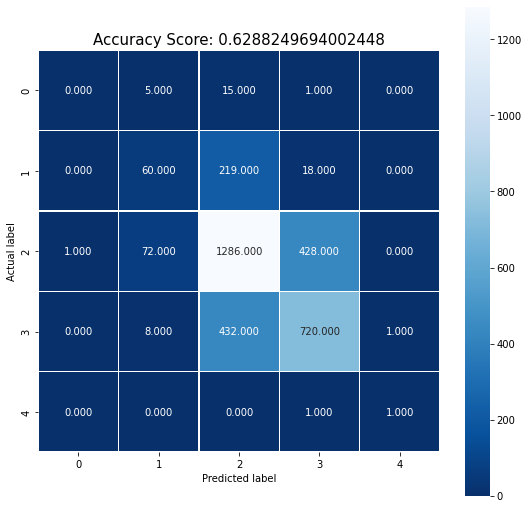

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
score = logisticRegr.score(test_X,test_Y)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', xticklabels=[0,1,2,3,4,5],yticklabels=[0,1,2,3,4,5]);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

11 Buckets

In [37]:
train_data_target=pd.read_csv('/content/gdrive/MyDrive/ML_Project/Dataset/train_11_buckets.csv')
test_data_target=pd.read_csv('/content/gdrive/MyDrive/ML_Project/Dataset/test_11_buckets.csv')
val_data_target=pd.read_csv('/content/gdrive/MyDrive/ML_Project/Dataset/valid_11_buckets.csv')

In [38]:
test_data_target.columns

Index(['data_IMDBscore'], dtype='object')

In [39]:
testData['data_IMDBscore']=test_data_target['data_IMDBscore']
trainData['data_IMDBscore']=train_data_target['data_IMDBscore']
validData ['data_IMDBscore']=val_data_target['data_IMDBscore']

In [40]:
trainData= trainData.append(validData, ignore_index=True)


In [41]:
train_X = trainData.drop(columns=['data_IMDBscore'])
train_Y = trainData['data_IMDBscore']
test_X = testData.drop(columns=['data_IMDBscore'])
test_Y = testData['data_IMDBscore']

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
logisticRegr = LogisticRegression(max_iter=1000)

In [44]:
logisticRegr.fit(train_X,train_Y)


LogisticRegression(max_iter=1000)

In [45]:
predictions=logisticRegr.predict(test_X)

In [46]:
# Use score method to get accuracy of model
print('Train Accuracy: ',logisticRegr.score(train_X, train_Y))


print('Test Accuracy: ', logisticRegr.score(test_X, test_Y))


Train Accuracy:  0.7245867991789997
Test Accuracy:  0.42533659730722156


  0%|          | 0/4 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 25%|██▌       | 1/4 [01:08<03:25, 68.53s/it]/usr/local/lib/python3.7

f1DictTrain
{'hinge': 0.6945879127100608, 'log': 0.6532248430221647, 'modified_huber': 0.689683425863298, 'perceptron': 0.608405058827602}
precisionDictTrain
{'hinge': 0.6980448769861434, 'log': 0.6767639175529808, 'modified_huber': 0.6934312787632408, 'perceptron': 0.6148336488922524}
recallDictTrain
{'hinge': 0.6959598141946635, 'log': 0.6604731554499298, 'modified_huber': 0.690882575348385, 'perceptron': 0.6107270173922437}
accDictTrain
{'hinge': 0.6959598141946635, 'log': 0.6604731554499298, 'modified_huber': 0.690882575348385, 'perceptron': 0.6107270173922437}
f1DictTest
{'hinge': 0.40370530466097604, 'log': 0.4136777444524618, 'modified_huber': 0.3926716147688634, 'perceptron': 0.37940436737702876}
recallDictTest
{'hinge': 0.41034271725826194, 'log': 0.43237454100367195, 'modified_huber': 0.39657282741738065, 'perceptron': 0.38616891064871484}
precisionDictTest
{'hinge': 0.39967178063519104, 'log': 0.4169032957345607, 'modified_huber': 0.3904986065464663, 'perceptron': 0.37652539

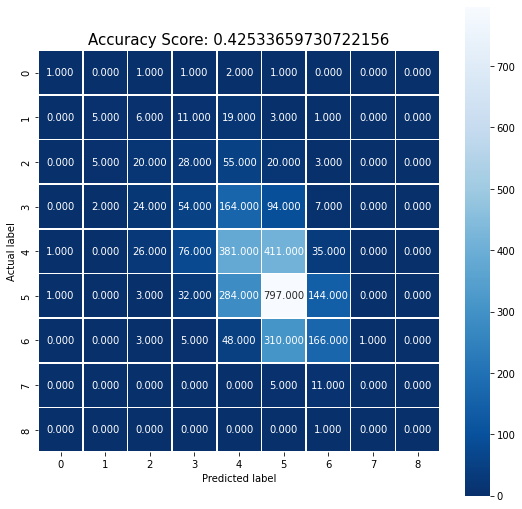

In [47]:
f1DictTrain={}
precisionDictTrain={}
recallDictTrain={}
accDictTrain={}
f1DictTest={}
recallDictTest={}
precisionDictTest={}
accDictTest={}
f1DictVal={}
precisionDictVal={}
recallDictVal={}
accDictVal={}
lossFn = ['hinge', 'log', 'modified_huber', 'perceptron']
for i in tqdm(range(len(lossFn))):
    fn = lossFn[i]
    sgd = SGDClassifier(learning_rate='optimal', verbose=0, max_iter=500, loss=fn)
    sgd.fit(train_X, train_Y)
    trainPreds = sgd.predict(train_X)
    testPreds = sgd.predict(test_X)
    valPreds = sgd.predict(val_X)
    key = str(fn)
    f1DictTrain[key] = f1_score(train_Y, trainPreds, average='weighted')
    precisionDictTrain[key] = precision_score(train_Y, trainPreds, average='weighted')
    recallDictTrain[key] = recall_score(train_Y, trainPreds, average='weighted')
    accDictTrain[key] = accuracy_score(train_Y, trainPreds, normalize=True)
    f1DictTest[key] = f1_score(test_Y, testPreds, average='weighted')
    precisionDictTest[key] = precision_score(test_Y, testPreds, average='weighted')
    recallDictTest[key] = recall_score(test_Y, testPreds, average='weighted')
    accDictTest[key] = accuracy_score(test_Y, testPreds, normalize=True)
    f1DictVal[key] = f1_score(val_Y, valPreds, average='weighted')
    precisionDictVal[key] = precision_score(val_Y, valPreds, average='weighted')
    recallDictVal[key] = recall_score(val_Y, valPreds, average='weighted')
    accDictVal[key] = accuracy_score(val_Y, valPreds, normalize=True)

print("f1DictTrain")
print(f1DictTrain)
print("precisionDictTrain")
print(precisionDictTrain)
print("recallDictTrain")
print(recallDictTrain)
print("accDictTrain")
print(accDictTrain)
print("f1DictTest")
print(f1DictTest)
print("recallDictTest")
print(recallDictTest)
print("precisionDictTest")
print(precisionDictTest)
print("accDictTest")
print(accDictTest)
print("f1DictVal")
print(f1DictVal)
print("precisionDictVal")
print(precisionDictVal)
print("recallDictVal")
print(recallDictVal)
print("accDictVal")
print(accDictVal)


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

sgd = SGDClassifier(learning_rate='optimal', verbose=0, max_iter=500, loss='log')
sgd.fit(train_X, train_Y)
predictions= sgd.predict(test_X)
cm = metrics.confusion_matrix(test_Y, predictions)
print(cm)

import matplotlib.pyplot as plt
import seaborn as sns
score = logisticRegr.score(test_X,test_Y)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

Twenty One Buckets

In [102]:
train_data_target=pd.read_csv('/content/gdrive/MyDrive/ML_Project/Dataset/train_21_buckets.csv')
test_data_target=pd.read_csv('/content/gdrive/MyDrive/ML_Project/Dataset/test_21_buckets.csv')
val_data_target=pd.read_csv('/content/gdrive/MyDrive/ML_Project/Dataset/valid_21_buckets.csv')

In [103]:
test_data_target.columns

Index(['data_IMDBscore'], dtype='object')

In [104]:
testData['data_IMDBscore']=test_data_target['data_IMDBscore']
trainData['data_IMDBscore']=train_data_target['data_IMDBscore']
validData ['data_IMDBscore']=val_data_target['data_IMDBscore']

In [105]:
train_X = trainData.drop(columns=['data_IMDBscore'])
train_Y = trainData['data_IMDBscore']*2
test_X = testData.drop(columns=['data_IMDBscore'])
test_Y = testData['data_IMDBscore']*2 

In [106]:
np.any(np.isnan(train_Y))


False

In [107]:
print(train_Y.shape)
print(train_X.shape)
np.any(np.isnan(train_X))

(15247,)
(15247, 3560)


False

In [108]:
from sklearn.linear_model import LogisticRegression

In [109]:
logisticRegr = LogisticRegression(max_iter=1000)

In [110]:
logisticRegr.fit(train_X,train_Y)


LogisticRegression(max_iter=1000)

In [111]:
predictions=logisticRegr.predict(test_X)

In [112]:
# Use score method to get accuracy of model
print('Train Accuracy: ',logisticRegr.score(train_X, train_Y))


print('Test Accuracy: ', logisticRegr.score(test_X, test_Y))


Train Accuracy:  0.7228963074703221
Test Accuracy:  0.22062423500611994


In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

  0%|          | 0/4 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificatio

f1DictTrain
{'hinge': 0.6686603466019829, 'log': 0.6447079685804334, 'modified_huber': 0.695296716014538, 'perceptron': 0.5966014291930205}
precisionDictTrain
{'hinge': 0.6733946292676611, 'log': 0.6607052834884679, 'modified_huber': 0.7000727106643575, 'perceptron': 0.6047172442750658}
recallDictTrain
{'hinge': 0.6686561290745721, 'log': 0.6421591132681839, 'modified_huber': 0.6944316914802912, 'perceptron': 0.6009050960844756}
accDictTrain
{'hinge': 0.6686561290745721, 'log': 0.6421591132681839, 'modified_huber': 0.6944316914802912, 'perceptron': 0.6009050960844756}
f1DictTest
{'hinge': 0.20658144600802056, 'log': 0.2171339804892658, 'modified_huber': 0.19648568665355895, 'perceptron': 0.2009420950244329}
recallDictTest
{'hinge': 0.20930232558139536, 'log': 0.2270501835985312, 'modified_huber': 0.19859241126070992, 'perceptron': 0.2047123623011016}
precisionDictTest
{'hinge': 0.20600183644494113, 'log': 0.21700515660879982, 'modified_huber': 0.19510169683255704, 'perceptron': 0.20236

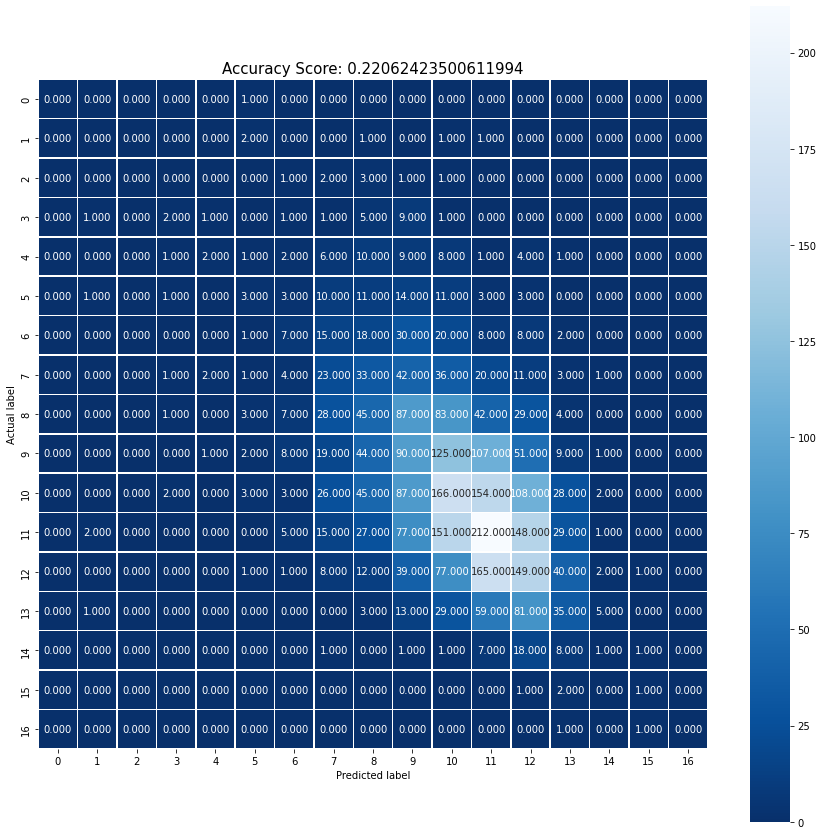

In [115]:
f1DictTrain={}
precisionDictTrain={}
recallDictTrain={}
accDictTrain={}
f1DictTest={}
recallDictTest={}
precisionDictTest={}
accDictTest={}
f1DictVal={}
precisionDictVal={}
recallDictVal={}
accDictVal={}
lossFn = ['hinge', 'log', 'modified_huber', 'perceptron']
for i in tqdm(range(len(lossFn))):
    fn = lossFn[i]
    sgd = SGDClassifier(learning_rate='optimal', verbose=0, max_iter=500, loss=fn)
    sgd.fit(train_X, train_Y)
    trainPreds = sgd.predict(train_X)
    testPreds = sgd.predict(test_X)
    valPreds = sgd.predict(val_X)
    key = str(fn)
    f1DictTrain[key] = f1_score(train_Y, trainPreds, average='weighted')
    precisionDictTrain[key] = precision_score(train_Y, trainPreds, average='weighted')
    recallDictTrain[key] = recall_score(train_Y, trainPreds, average='weighted')
    accDictTrain[key] = accuracy_score(train_Y, trainPreds, normalize=True)
    f1DictTest[key] = f1_score(test_Y, testPreds, average='weighted')
    precisionDictTest[key] = precision_score(test_Y, testPreds, average='weighted')
    recallDictTest[key] = recall_score(test_Y, testPreds, average='weighted')
    accDictTest[key] = accuracy_score(test_Y, testPreds, normalize=True)
    f1DictVal[key] = f1_score(val_Y, valPreds, average='weighted')
    precisionDictVal[key] = precision_score(val_Y, valPreds, average='weighted')
    recallDictVal[key] = recall_score(val_Y, valPreds, average='weighted')
    accDictVal[key] = accuracy_score(val_Y, valPreds, normalize=True)

print("f1DictTrain")
print(f1DictTrain)
print("precisionDictTrain")
print(precisionDictTrain)
print("recallDictTrain")
print(recallDictTrain)
print("accDictTrain")
print(accDictTrain)
print("f1DictTest")
print(f1DictTest)
print("recallDictTest")
print(recallDictTest)
print("precisionDictTest")
print(precisionDictTest)
print("accDictTest")
print(accDictTest)
print("f1DictVal")
print(f1DictVal)
print("precisionDictVal")
print(precisionDictVal)
print("recallDictVal")
print(recallDictVal)
print("accDictVal")
print(accDictVal)


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

sgd = SGDClassifier(learning_rate='optimal', verbose=0, max_iter=500, loss='log')
sgd.fit(train_X, train_Y)
predictions= sgd.predict(test_X)
cm = metrics.confusion_matrix(test_Y, predictions)
print(cm)

import matplotlib.pyplot as plt
import seaborn as sns
score = logisticRegr.score(test_X,test_Y)
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);